In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(X1_pos,X1_neg,X2_pos,X2_neg,w):
    plt.figure()
    plt.plot(X1_pos,X2_pos,'bo')    #positive class
    plt.plot(X1_neg,X2_neg,'r+')   #negative class
    x = np.linspace(-100, 100, 20)
    plt.plot(x, (5*x + 10)/(8), linestyle='solid', label="Target Function")   #target function
    a = w[1]
    b = w[2]
    c = w[0]
    plt.plot(x, (a*x + c)/(-b), linestyle='dashed',label="Hypothesis Function")   #classifier function
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Linearly Seperable Data")
    plt.legend()
    plt.show()

In [3]:
#generating linearly seperable dataset
#line => ax +by +c  = 0
a = 5
b = -8
c = 10
def ispositive(x1,x2):
    sign = a*x1 + b*x2 + c
    if(sign>=0):  #postive class i.e. line>=0
        return True
    return False
    

In [4]:
def dataset_construction(size):
    pos_class_size = random.randrange(size/4,3*size/4,1)
    neg_class_size = size - pos_class_size
    print("positive class size",pos_class_size)
    print("negative class size",neg_class_size)
    pos_cnt = 0
    neg_cnt = 0
    datalist = []
    while(pos_cnt<pos_class_size or neg_cnt<neg_class_size):
        x1 = random.randrange(-100,100,1)
        x2 = random.randrange(-100,100,1)
        if(ispositive(x1,x2)):
            if(pos_cnt<pos_class_size):
                pos_cnt+=1
                datalist.append([x1,x2,1])
        else:
            if(neg_cnt<neg_class_size):
                neg_cnt+=1
                datalist.append([x1,x2,-1])  
    dataset = np.array(datalist).reshape(size,3)
    return dataset

In [5]:
#segregating dataset acc. to class
dataset = dataset_construction(20)
X1_pos = []
X2_pos = []
X1_neg = []
X2_neg = []
for i in range(20):
    if(dataset[i][2]==1):
        X1_pos.append(dataset[i][0])
        X2_pos.append(dataset[i][1])
    else:
        X1_neg.append(dataset[i][0])
        X2_neg.append(dataset[i][1])

positive class size 11
negative class size 9


Text(0.5, 1.0, 'Linearly Seperable Data')

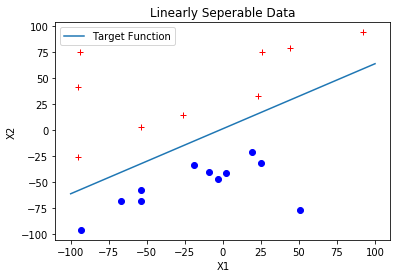

In [6]:
plt.figure()
plt.plot(X1_pos,X2_pos,'bo')    #positive class
plt.plot(X1_neg,X2_neg,'r+')   #negative class
x = np.linspace(-100, 100, 20)
plt.plot(x, (a*x + c)/(-b), linestyle='solid',label = "Target Function")   #target function
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Linearly Seperable Data")

In [7]:
w0 = random.randrange(0,100,1)
w1 = random.randrange(0,100,1)
w2 = random.randrange(0,100,1)
w = np.array([w0,w1,w2])
#alternate ways
# w = np.random.rand(1,3)
w

array([65, 78, 13])

In [8]:
#adding x0 in X
x = np.ones((20,3))
x[:,1:] = dataset[:,:-1]
y = np.ones((20,1))
y = dataset[:,2]
w_transition = []
w_transition.append(w)

In [9]:
#perceptron learning algorithm
def perceptron_learning_algo(X,Y,learning_rate,w):
    misclassified_samples  = True
    iterations = 0
    while(misclassified_samples):
        misclassified_samples = False
        iterations+=1
        for idx,x in enumerate(X):
            prod = w.dot(x)
            if(-1*prod*Y[idx] > 0):    #misclassification problem
                misclassified_samples = True
                w = w + learning_rate*x*Y[idx]
                w_transition.append(w)
#                 plot(X1_pos,X1_neg,X2_pos,X2_neg,w)
    return (w,iterations)                

In [10]:
W,iterations = perceptron_learning_algo(x,y,1,w)

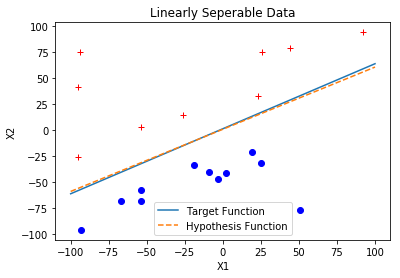

In [11]:
plot(X1_pos,X1_neg,X2_pos,X2_neg,W)

In [12]:
print("No. of iterations",iterations)

No. of iterations 2


In [13]:
###same with size of 100
dataset = dataset_construction(100)
# print(dataset)
X1_pos = []
X2_pos = []
X1_neg = []
X2_neg = []
for i in range(100):
    if(dataset[i][2]==1):
        X1_pos.append(dataset[i][0])
        X2_pos.append(dataset[i][1])
    else:
        X1_neg.append(dataset[i][0])
        X2_neg.append(dataset[i][1])

positive class size 60
negative class size 40


Text(0.5, 1.0, 'Linearly Seperable Data')

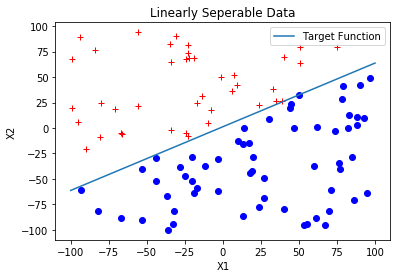

In [14]:
plt.figure()
plt.plot(X1_pos,X2_pos,'bo')    #positive class
plt.plot(X1_neg,X2_neg,'r+')   #negative class
x = np.linspace(-100, 100, 20)
plt.plot(x, (a*x + c)/(-b), linestyle='solid',label = "Target Function")   #target function
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Linearly Seperable Data")

In [15]:
w0 = random.randrange(0,100,1)
w1 = random.randrange(0,100,1)
w2 = random.randrange(0,100,1)
w = np.array([w0,w1,w2])
#alternate ways
# w = np.random.rand(1,3)

array([51, 64, 75])

In [16]:
#adding x0 in X
x = np.ones((100,3))
x[:,1:] = dataset[:,:-1]
y = np.ones((100,1))
y = dataset[:,2]
w_transition = []
w_transition.append(w)

In [17]:
W,iterations = perceptron_learning_algo(x,y,1,w)

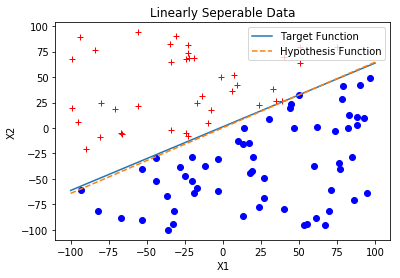

In [18]:
plot(X1_pos,X1_neg,X2_pos,X2_neg,W)

In [19]:
print("No. of iterations",iterations)

No. of iterations 9
